In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df = pd.read_excel('/content/Reviews_part_4.xlsx')
print(df.head())

   listing_id        id       date  reviewer_id reviewer_name  \
0      529090  11165072 2014-03-23      3157621         James   
1      529090  11380524 2014-03-31      5593192          Rita   
2      529090  11980486 2014-04-20      5644768        Sophia   
3      529090  12258222 2014-04-27     14341908          Sara   
4      529090  12322098 2014-04-28     14606809       Charley   

                                            comments  
0  My stay here was great.  I was here for 2 nigh...  
1  It is a safe place to stay in downtown Seattle...  
2  Great location. Walkable to everything we want...  
3  I had a great experience. It was the perfect l...  
4  Alice was very pleasant and easy to communicat...  


3. Sanity check of data

In [11]:
df.shape

(12122, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12122 entries, 0 to 12121
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     12122 non-null  int64         
 1   id             12122 non-null  int64         
 2   date           12122 non-null  datetime64[ns]
 3   reviewer_id    12122 non-null  int64         
 4   reviewer_name  12122 non-null  object        
 5   comments       12118 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 568.3+ KB


In [5]:
df.isnull().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,0
comments,4


In [6]:
df.isnull().sum()/df.shape[0] * 100

,0
listing_id,0.000000
id,0.000000
date,0.000000
reviewer_id,0.000000
reviewer_name,0.000000
comments,0.032998


In [7]:
#finding duplicates
df.duplicated().sum()

0

In [13]:
#Garbage value
for i  in df.select_dtypes(include = "object").columns:
  print(i)
  print(df[i].value_counts())
  print("********"*10)

reviewer_name
reviewer_name
Michael     140
David       133
Sarah        90
Chris        85
Jennifer     81
           ... 
Reesa         1
Bernease      1
Niko          1
Vijay         1
Umur          1
Name: count, Length: 3769, dtype: int64
********************************************************************************
comments
comments
The reservation was canceled the day before arrival. This is an automated posting.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

4. EDA

In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
listing_id,12122.0,3197002.41767,13068.0,856550.0,2935486.0,4879013.0,10248139.0,2435143.418969
id,12122.0,31777728.347797,62352.0,18799702.5,33514074.0,45283921.75,58697946.0,15858300.844504
date,12122,2015-01-30 11:40:16.828905984,2010-07-08 00:00:00,2014-09-01 00:00:00,2015-05-29 00:00:00,2015-09-01 00:00:00,2016-01-03 00:00:00,NaN
reviewer_id,12122.0,17625537.586784,262.0,5639472.0,15183434.0,28314192.75,52583740.0,13488475.053517


In [20]:
df.describe(include = "object")

,reviewer_name,comments
count,12122,12118
unique,3769,12066
top,Michael,The reservation was canceled the day before ar...
freq,140,9


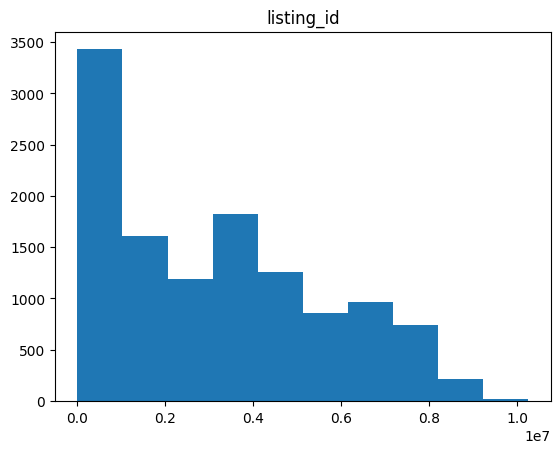

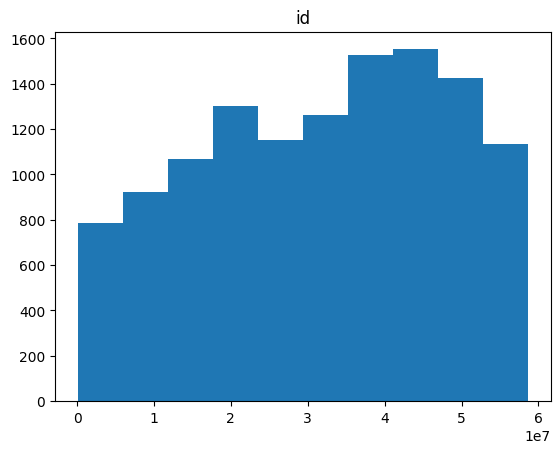

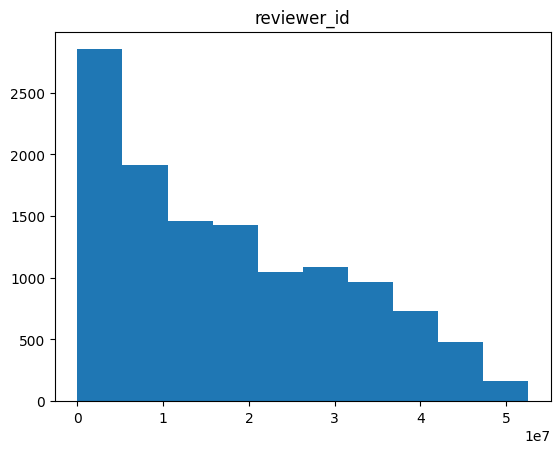

In [25]:
#Histogram to understand the distribution
for i in df.select_dtypes(include = "number").columns:
  #sns.histplot(data=df,x=i)
  plt.hist(df[i])
  plt.title(i)
  plt.show()

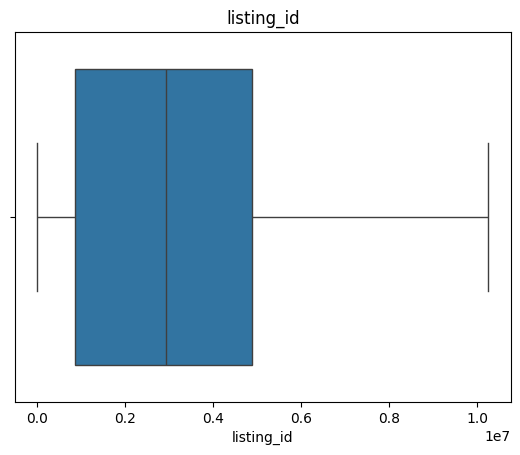

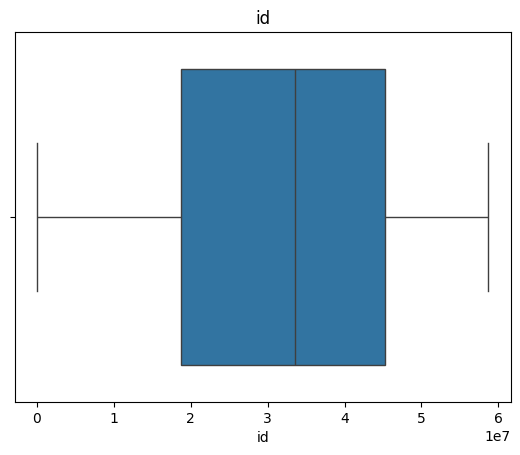

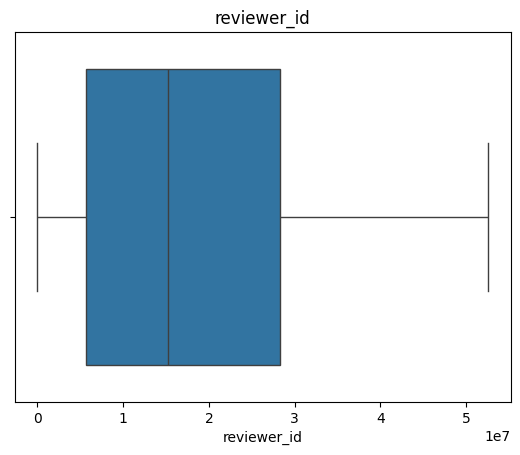

In [26]:
#Box-plot to identify outliers
for i in df.select_dtypes(include = "number").columns:
  sns.boxplot(data=df,x=i)
  plt.title(i)
  plt.show()

In [31]:
#scatter plot to understand the relationship

df.select_dtypes(include = "number").corr().style.background_gradient(cmap = "coolwarm")

,listing_id,id,reviewer_id
listing_id,1.000000,0.617047,0.343118
id,0.617047,1.000000,0.523740
reviewer_id,0.343118,0.523740,1.000000


If your DataFrame has numerical columns such as age, salary, and height, the correlation matrix might look like this:

age	salary	height
age	1.00	0.45	0.20
salary	0.45	1.00	0.35
height	0.20	0.35	1.00
With the coolwarm colormap:

Values close to 1 (strong positive correlation) are shaded in red.
Values close to -1 (strong negative correlation) are shaded in blue.
Values around 0 (no correlation) are shaded with neutral colors.
This is an excellent way to visually inspect the strength of relationships between your numerical features during the EDA process.

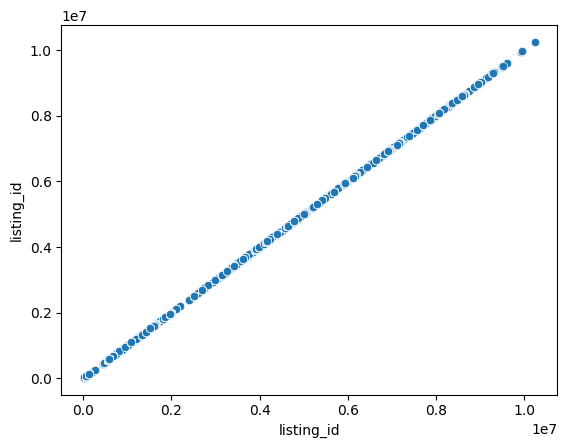

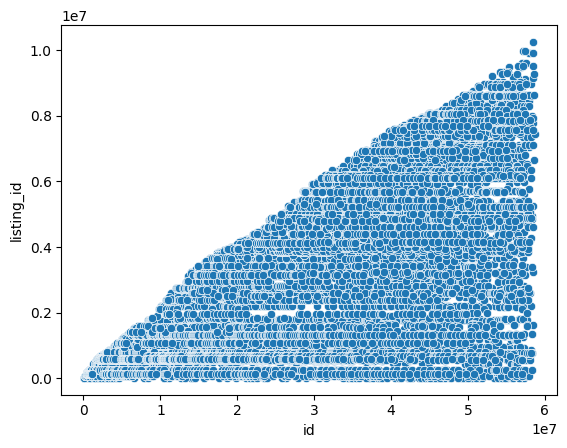

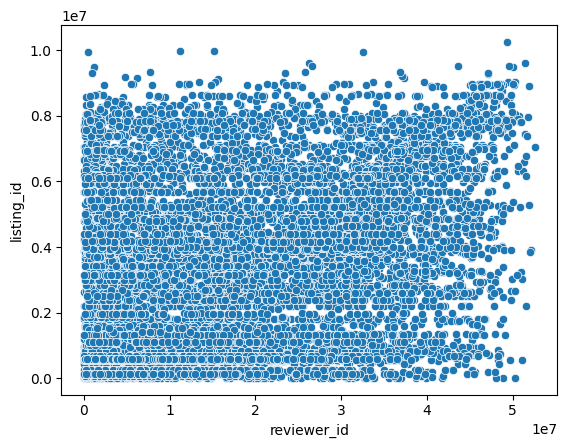

In [12]:
for i in ['listing_id','id','reviewer_id']:

  sns.scatterplot(data=df,x=i,y='listing_id')
  plt.show()

In [13]:
# Ensure all columns are of numeric dtype (int or float)
df['listing_id'] = pd.to_numeric(df['listing_id'], errors='coerce')
df['id'] = pd.to_numeric(df['id'], errors='coerce')
df['reviewer_id'] = pd.to_numeric(df['reviewer_id'], errors='coerce')


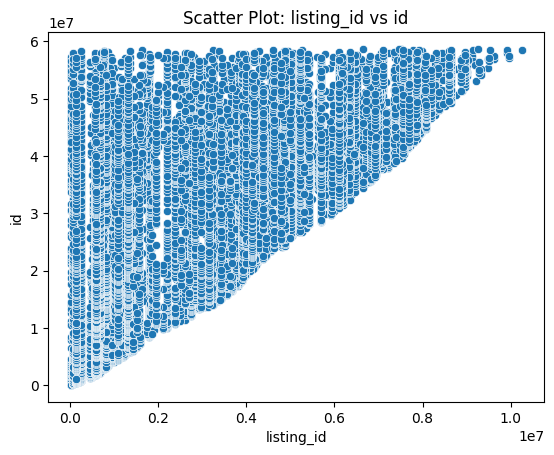

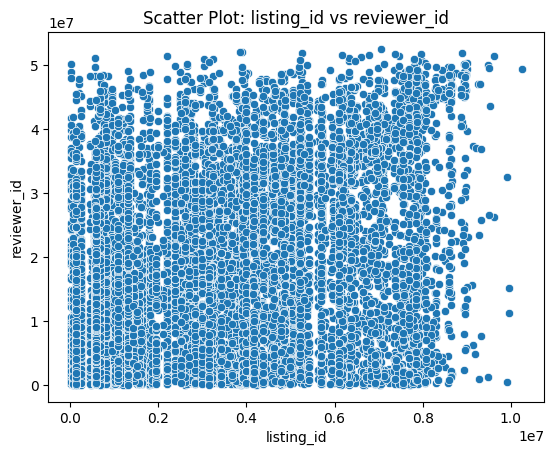

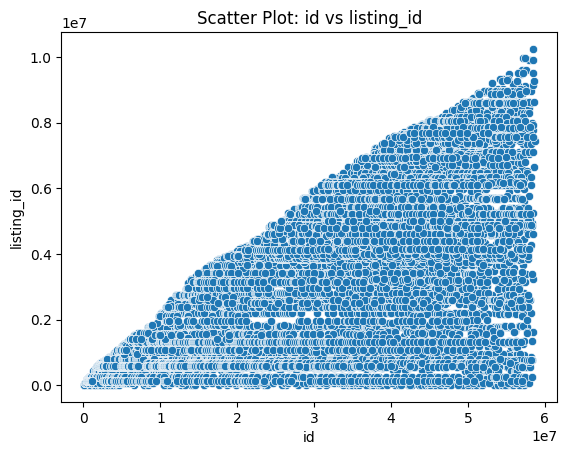

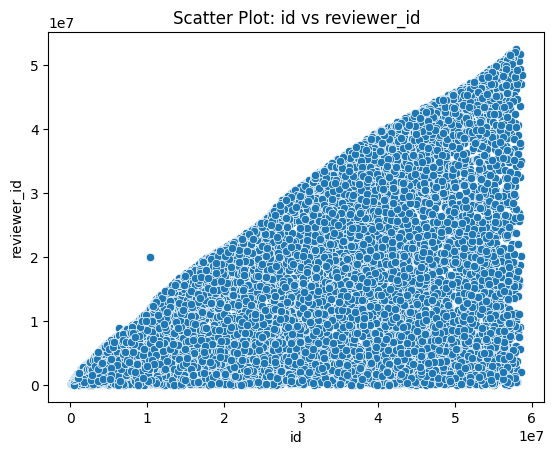

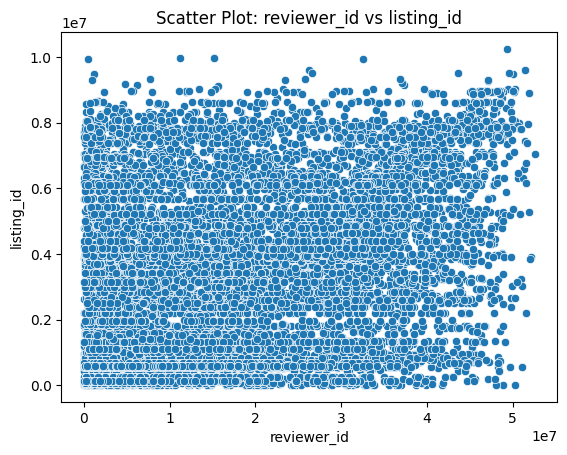

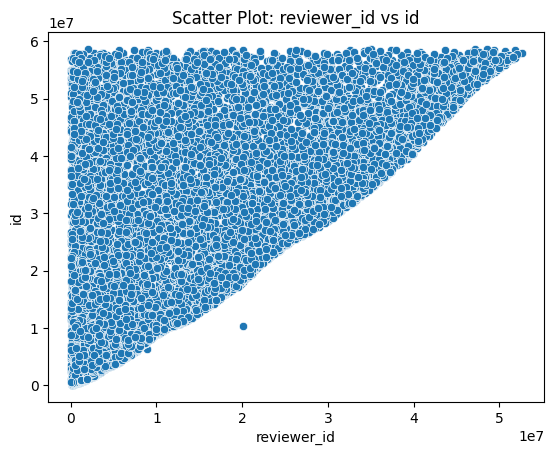

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to compare
columns = ['listing_id', 'id', 'reviewer_id']

# Plot scatter plots for all pairs
for i in columns:
    for j in columns:
        if i != j:  # Avoid plotting a variable against itself
            sns.scatterplot(data=df, x=i, y=j)
            plt.title(f'Scatter Plot: {i} vs {j}')
            plt.show()


In [18]:
#correlation with heatmap to interpret the relation and multicollinarity
s = df.select_dtypes(include = "number").corr()

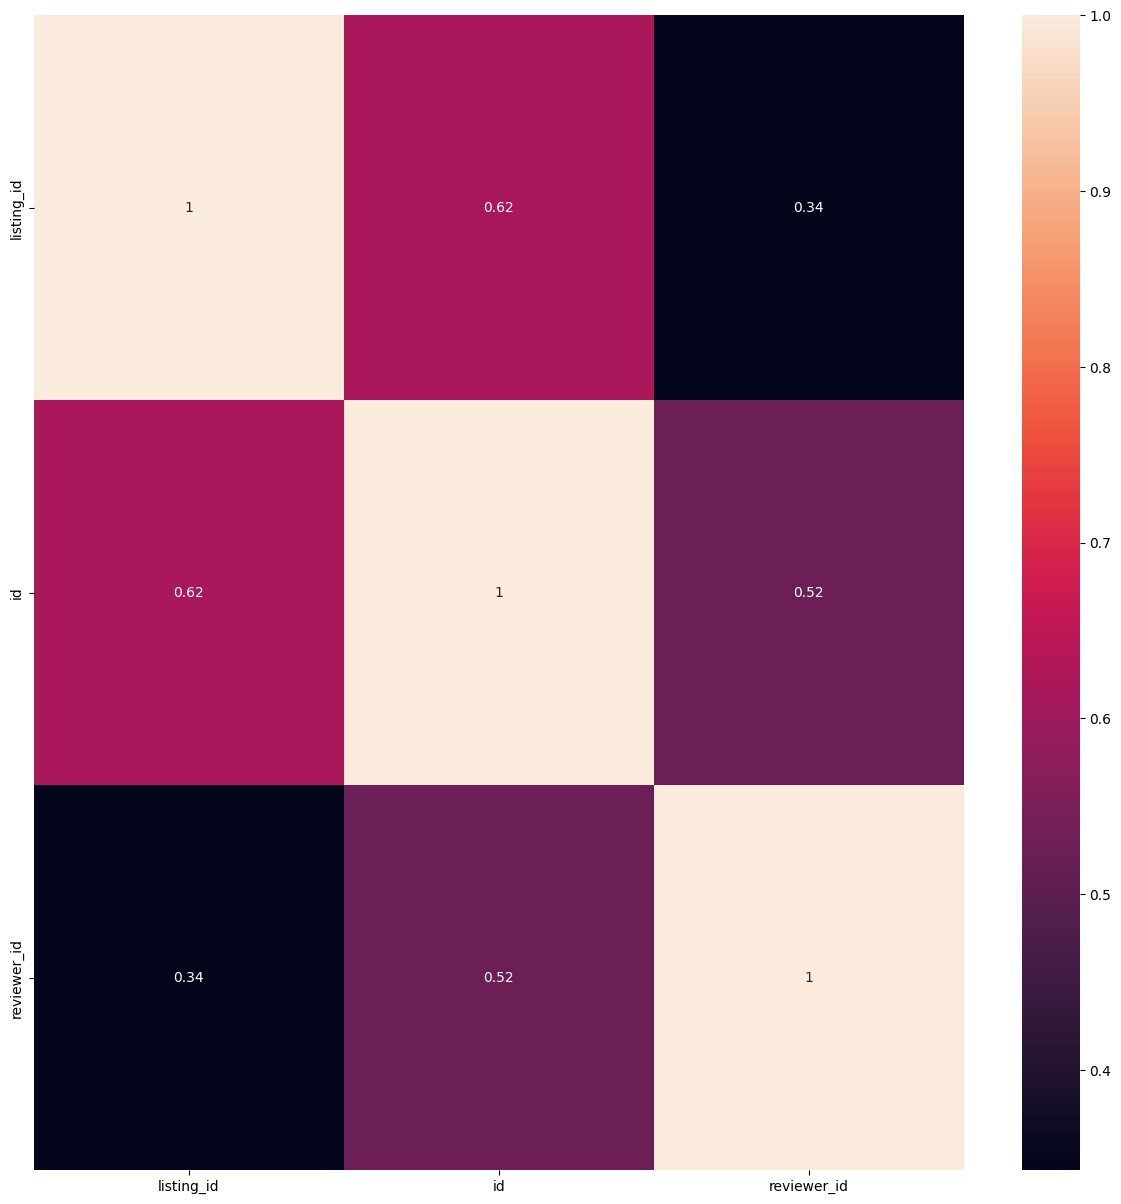

In [23]:
plt.figure(figsize=(15, 15))  # Pass figsize as a tuple (width, height)
sns.heatmap(s, annot=True)
plt.show()  # Ensure you show the plot after creating it


5. Missing value Treatement

In [ ]:
#choose the method of inputing missing value
#Like mean, median, mode or KNNInputer


In [24]:
df.isnull().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,0
comments,4


In [26]:
most_common_comment = df['comments'].mode()[0]  # Get the most common comment
df['comments'].fillna(most_common_comment, inplace=True)

In [27]:
df.isnull().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,0
comments,0


In [29]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

In [35]:
# Create an imputer object with a specified strategy
impute = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.


NameError: name 'SimpleImputer' is not defined

In [34]:
for i in df.select_dtypes(include = "number").columns:
  df[i] = impute.fit_transform(df[i])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [36]:
df.drop_duplicates()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,529090,11165072,2014-03-23,3157621,James,My stay here was great. I was here for 2 nigh...
1,529090,11380524,2014-03-31,5593192,Rita,It is a safe place to stay in downtown Seattle...
2,529090,11980486,2014-04-20,5644768,Sophia,Great location. Walkable to everything we want...
3,529090,12258222,2014-04-27,14341908,Sara,I had a great experience. It was the perfect l...
4,529090,12322098,2014-04-28,14606809,Charley,Alice was very pleasant and easy to communicat...
...,...,...,...,...,...,...
12117,7699096,48002388,2015-09-22,9534154,Mark,Excellent location and well setup apartment fo...
12118,7699096,48910159,2015-09-29,10847853,Brandon,Awesome place with everything you need in a lo...
12119,7699096,49907392,2015-10-07,43308708,Joanne,My husband and I had a wonderful stay. The pla...
12120,7699096,51949500,2015-10-25,10390377,Umur,Everything was as described and it was an awes...


In [38]:
from google.colab import files

# Download the CSV file
files.download('cleaned_data.csv')

# Or for the Excel file
# files.download('cleaned_data.xlsx')


FileNotFoundError: Cannot find file: cleaned_data.csv

In [39]:
# Make sure to install openpyxl or xlsxwriter if not already installed
# pip install openpyxl

# Specify the file path and name for the Excel file
excel_file_path = 'cleaned_data.xlsx'

# Save the cleansed DataFrame to Excel
df.to_excel(excel_file_path, index=False)  # index=False to exclude row indices

print(f'Data saved to {excel_file_path}')


Data saved to cleaned_data.xlsx


In [40]:
from google.colab import files

# Download the CSV file
files.download('cleaned_data.csv')

# Or for the Excel file
# files.download('cleaned_data.xlsx')


FileNotFoundError: Cannot find file: cleaned_data.csv